In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
name = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv('/content/housing.csv',delim_whitespace=True, names=name)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
# there are a total of 506 data points in the dataset
# Dataset has 13 independent features and 1 dependent variable(MEDV)

In [ ]:
# exploring dataset - info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# checking for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# no missing values found

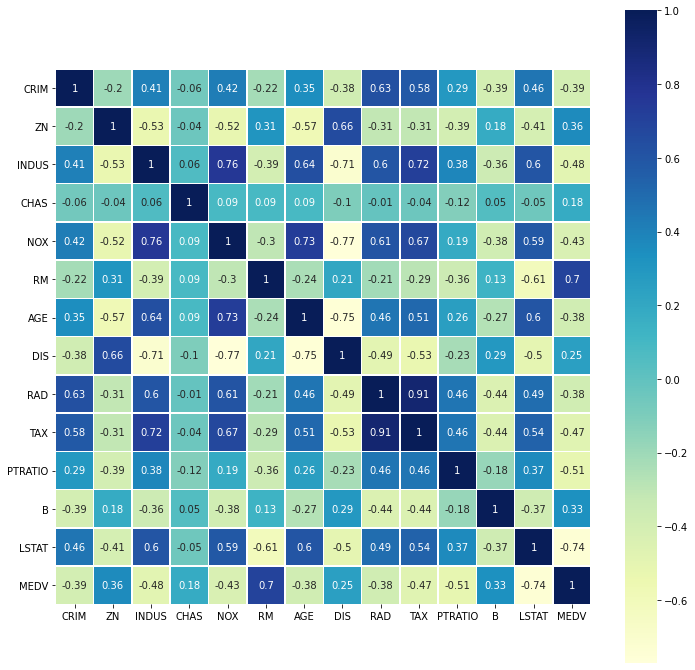

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr().round(2),cmap='YlGnBu',annot=True, linewidths=.5, square=True)

It is observed that INDUS, RM, TAX, PTRATIO and LSTAT shows some good correaltion with MEDV. INDUS shows a good with NOX and TAX. TAX is highly correlated with RAD

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


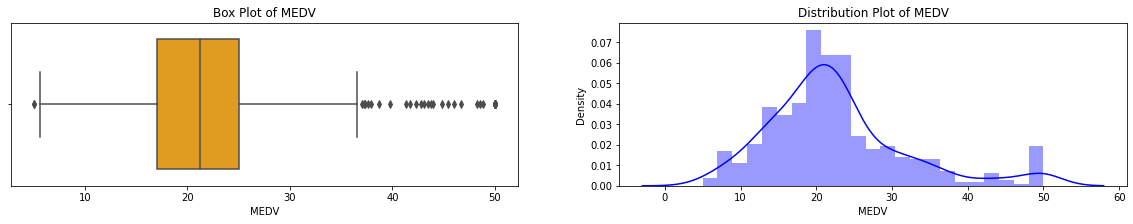

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.MEDV,color='orange')
plt.title('Box Plot of MEDV')

plt.subplot(1,2,2)
sns.distplot(a=df.MEDV,color='blue')
plt.title('Distribution Plot of MEDV')
plt.show()

In [ ]:
# removing the outliers
df = df[~(df['MEDV']==50)]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


16 rows were removed from dataset . no of data pts = 506-16=490

In [ ]:
df1 = df[['TAX','RM','MEDV']]
df2 = df[['RM','LSTAT','MEDV']]
df3 = df[['TAX','INDUS','MEDV']]
df4 = df[['TAX','PTRATIO','MEDV']]
df5 = df[['RM','TAX','LSTAT','MEDV']]
df6 = df[['PTRATIO','INDUS','LSTAT','MEDV']]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


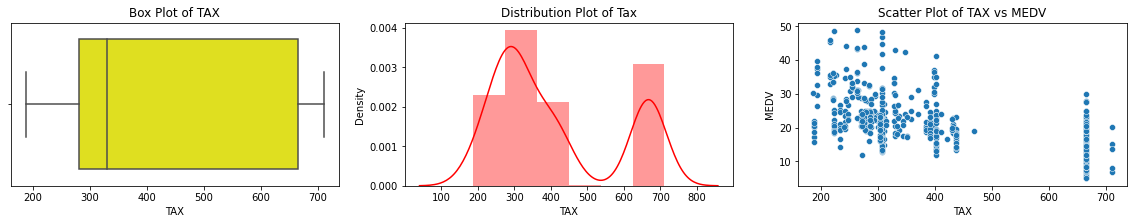

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df.TAX,color='yellow')
plt.title('Box Plot of TAX')

plt.subplot(1,3,2)
sns.distplot(a=df.TAX,color='red')
plt.title('Distribution Plot of Tax')

plt.subplot(1,3,3)
sns.scatterplot(df.TAX,df.MEDV)
plt.title('Scatter Plot of TAX vs MEDV')

plt.show()

scatter plot and distribution plot show outlier. the scatter plot does not show normal distribution. box plot does not show outliers.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


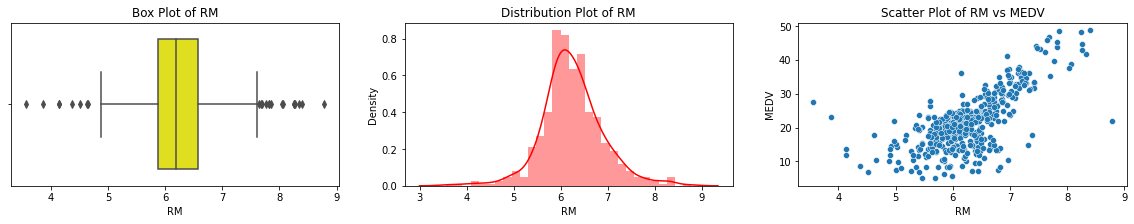

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df.RM,color='yellow')
plt.title('Box Plot of RM')

plt.subplot(1,3,2)
sns.distplot(a=df.RM,color='red')
plt.title('Distribution Plot of RM')

plt.subplot(1,3,3)
sns.scatterplot(df.RM,df.MEDV)
plt.title('Scatter Plot of RM vs MEDV')

plt.show()

there are outliers on both extremes as seend from the box plot, the scatter plot show normal distributions


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


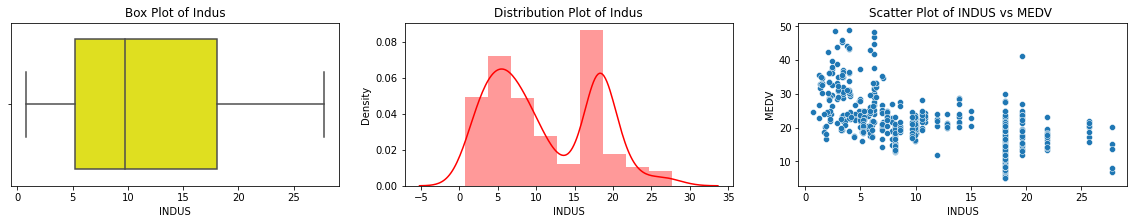

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df.INDUS,color='yellow')
plt.title('Box Plot of Indus')

plt.subplot(1,3,2)
sns.distplot(a=df.INDUS,color='red')
plt.title('Distribution Plot of Indus')

plt.subplot(1,3,3)
sns.scatterplot(df.INDUS,df.MEDV)
plt.title('Scatter Plot of INDUS vs MEDV ')

plt.show()

box plot does not show outliers but the scatter and distribution plot show outlier the scatter plot does not show normal distribution

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


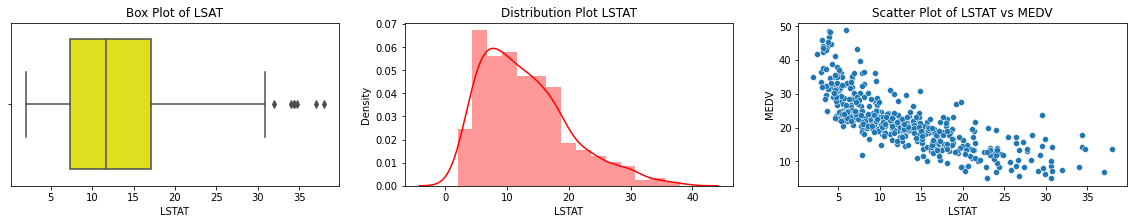

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df.LSTAT,color='yellow')
plt.title('Box Plot of LSAT')

plt.subplot(1,3,2)
sns.distplot(a=df.LSTAT,color='red')
plt.title('Distribution Plot LSTAT')

plt.subplot(1,3,3)
sns.scatterplot(df.LSTAT,df.MEDV)
plt.title('Scatter Plot of LSTAT vs MEDV')

plt.show()

there are outliers on upper extremes , as seen from the box plot . the scatterplot seems to show normal distribution

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


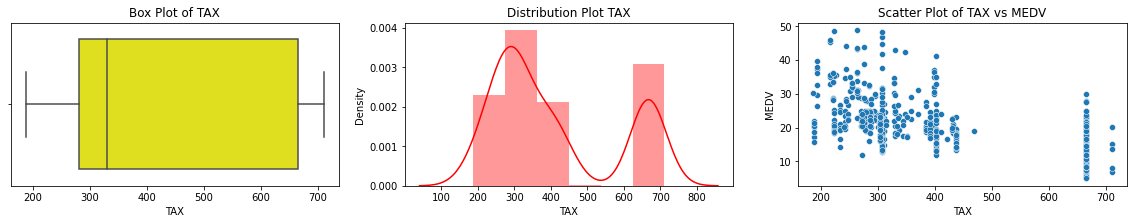

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df.TAX,color='yellow')
plt.title('Box Plot of TAX')

plt.subplot(1,3,2)
sns.distplot(a=df.TAX,color='red')
plt.title('Distribution Plot TAX')

plt.subplot(1,3,3)
sns.scatterplot(df.TAX,df.MEDV)
plt.title('Scatter Plot of TAX vs MEDV')

plt.show()

box plot does not show outliers , scatterplot and distribution plot show outlier , scatterplot does not show normal distribution

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


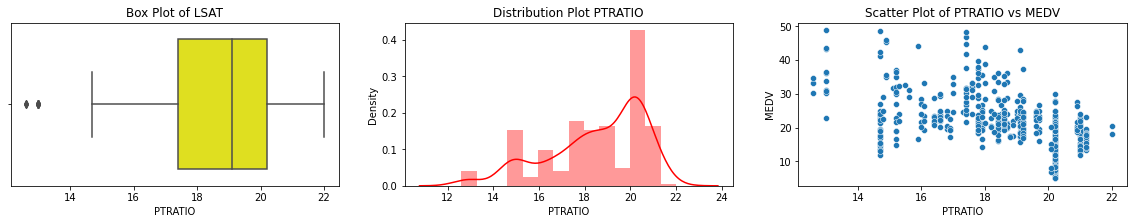

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df.PTRATIO,color='yellow')
plt.title('Box Plot of LSAT')

plt.subplot(1,3,2)
sns.distplot(a=df.PTRATIO,color='red')
plt.title('Distribution Plot PTRATIO')

plt.subplot(1,3,3)
sns.scatterplot(df.PTRATIO,df.MEDV)
plt.title('Scatter Plot of PTRATIO vs MEDV')

plt.show()

there are outliers on lower extremes as seen from the box plot, the scatter plot shows normal distribution

In [ ]:
x1 = df1.iloc[:,0:2].values
y1 = df1.iloc[:,-1:].values

x2 = df2.iloc[:,0:2].values
y2 = df2.iloc[:,-1:].values

x3 = df3.iloc[:,0:2].values
y3 = df3.iloc[:,-1:].values

x4 = df4.iloc[:,0:2].values
y4 = df4.iloc[:,-1:].values

x5 = df5.iloc[:,0:2].values
y5 = df5.iloc[:,-1:].values

x6 = df6.iloc[:,0:2].values
y6 = df6.iloc[:,-1:].values



In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x1)
x1 = scaler.transform(x1)
x1[0:10]

array([[-0.66710128,  0.50503976],
       [-0.98873354,  0.26901737],
       [-0.98873354,  1.43993368],
       [-1.1078566 ,  1.15333505],
       [-1.1078566 ,  1.38169439],
       [-1.1078566 ,  0.28281088],
       [-0.57775899, -0.35782134],
       [-0.57775899, -0.11260326],
       [-0.57775899, -0.94174688],
       [-0.57775899, -0.37008224]])

In [ ]:
scaler.fit(x2)
x2 = scaler.transform(x2)
scaler.fit(x3)
x3 = scaler.transform(x3)
scaler.fit(x4)
x4 = scaler.transform(x4)
scaler.fit(x5)
x5 = scaler.transform(x5)
scaler.fit(x6)
x6 = scaler.transform(x6)


In [ ]:
# adding bias = 1
m,n = x1.shape
x1 = np.append(arr = np.ones((m,1)),values=x1,axis=1)
x1

array([[ 1.        , -0.66710128,  0.50503976],
       [ 1.        , -0.98873354,  0.26901737],
       [ 1.        , -0.98873354,  1.43993368],
       ...,
       [ 1.        , -0.8040928 ,  1.11961757],
       [ 1.        , -0.8040928 ,  0.84068201],
       [ 1.        , -0.8040928 , -0.33023431]])

In [ ]:
m,n = x2.shape
x2 = np.append(arr=np.ones((m,1)),values=x2,axis=1)
m,n = x3.shape
x3 = np.append(arr=np.ones((m,1)),values=x3,axis=1)
m,n = x4.shape
x4 = np.append(arr=np.ones((m,1)),values=x4,axis=1)
m,n = x5.shape
x5 = np.append(arr=np.ones((m,1)),values=x5,axis=1)
m,n = x6.shape
x6 = np.append(arr=np.ones((m,1)),values=x6,axis=1)

In [ ]:
# splitting into train and test sets - 20% test split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.2,random_state=42)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.2,random_state=42)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.2,random_state=42)
x5_train, x5_test, y5_train, y5_test = train_test_split(x5,y5,test_size=0.2,random_state=42)
x6_train, x6_test, y6_train, y6_test = train_test_split(x6,y6,test_size=0.2,random_state=42)

In [ ]:
model1 = LinearRegression()
model1.fit(x1_train,y1_train)
y1_pred = model1.predict(x1_test)

model2 = LinearRegression()
model2.fit(x2_train,y2_train)
y2_pred = model2.predict(x2_test)

model3 = LinearRegression()
model3.fit(x3_train,y3_train)
y3_pred = model3.predict(x3_test)

model4 = LinearRegression()
model4.fit(x4_train,y4_train)
y4_pred = model4.predict(x4_test)

model5 = LinearRegression()
model5.fit(x5_train,y5_train)
y5_pred = model5.predict(x5_test)

model6 = LinearRegression()
model6.fit(x6_train,y6_train)
y6_pred = model6.predict(x6_test)

In [ ]:
# comparing RMSE and r squared values of models
rmse1 = (np.sqrt(mean_squared_error(y1_test, y1_pred)))
rmse2 = (np.sqrt(mean_squared_error(y2_test, y2_pred)))
rmse3 = (np.sqrt(mean_squared_error(y3_test, y3_pred)))
rmse4 = (np.sqrt(mean_squared_error(y4_test, y4_pred)))
rmse5 = (np.sqrt(mean_squared_error(y5_test, y5_pred)))
rmse6 = (np.sqrt(mean_squared_error(y6_test, y6_pred)))
r21 = r2_score(y1_test, y1_pred)
r22 = r2_score(y2_test, y2_pred)
r23 = r2_score(y3_test, y3_pred)
r24 = r2_score(y4_test, y4_pred)
r25 = r2_score(y5_test, y5_pred)
r26 = r2_score(y6_test, y6_pred)


In [ ]:
from prettytable import PrettyTable

In [ ]:
measure = [['model1',rmse1,r21],
           ['model2',rmse2,r22],
           ['model3',rmse3,r23],
           ['model4',rmse4,r24],
           ['model5',rmse5,r25],
           ['model6',rmse6,r26]]

In [ ]:
table = PrettyTable(['Model','RMSE','R sq'])

In [ ]:
for row in measure:
  table.add_row(row)

print(table)

+--------+--------------------+--------------------+
| Model  |        RMSE        |        R sq        |
+--------+--------------------+--------------------+
| model1 | 4.349257094675249  | 0.6297170396071536 |
| model2 | 4.438137541161106  | 0.6144283619436801 |
| model3 | 5.4459985710140195 | 0.4194246239182121 |
| model4 | 5.569125989021645  | 0.3928756493790527 |
| model5 |  4.34925709467525  | 0.6297170396071535 |
| model6 |  5.34741074756282  |  0.44025444271268  |
+--------+--------------------+--------------------+


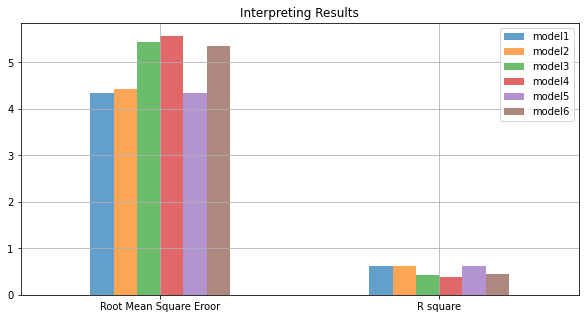

In [ ]:
results = pd.DataFrame({'model1':[rmse1,r21],
                        'model2':[rmse2,r22],
                        'model3':[rmse3,r23],
                        'model4':[rmse4,r24],
                        'model5':[rmse5,r25],
                        'model6':[rmse6,r26]},
                       index=['Root Mean Square Eroor','R square'])
results.plot(kind = 'bar',alpha = 0.7, grid=True, title='Interpreting Results', rot = 0, figsize=(10,5))

In [ ]:
# splitting into train and test sets - 40% test split
x7_train, x7_test, y7_train, y7_test = train_test_split(x1,y1,test_size=0.4,random_state=42)
x8_train, x8_test, y8_train, y8_test = train_test_split(x2,y2,test_size=0.4,random_state=42)
x9_train, x9_test, y9_train, y9_test = train_test_split(x3,y3,test_size=0.4,random_state=42)
x10_train, x10_test, y10_train, y10_test = train_test_split(x4,y4,test_size=0.4,random_state=42)
x11_train, x11_test, y11_train, y11_test = train_test_split(x5,y5,test_size=0.4,random_state=42)
x12_train, x12_test, y12_train, y12_test = train_test_split(x6,y6,test_size=0.4,random_state=42)

In [ ]:
model7 = LinearRegression()
model7.fit(x7_train,y7_train)
y7_pred = model7.predict(x7_test)

model8 = LinearRegression()
model8.fit(x8_train,y8_train)
y8_pred = model8.predict(x8_test)

model9 = LinearRegression()
model9.fit(x9_train,y9_train)
y9_pred = model9.predict(x9_test)

model10 = LinearRegression()
model10.fit(x10_train,y10_train)
y10_pred = model10.predict(x10_test)

model11 = LinearRegression()
model11.fit(x11_train,y11_train)
y11_pred = model11.predict(x11_test)

model12 = LinearRegression()
model12.fit(x12_train,y12_train)
y12_pred = model12.predict(x12_test)


In [ ]:
rmse7 = (np.sqrt(mean_squared_error(y7_test, y7_pred)))
rmse8 = (np.sqrt(mean_squared_error(y8_test, y8_pred)))
rmse9 = (np.sqrt(mean_squared_error(y9_test, y9_pred)))
rmse10 = (np.sqrt(mean_squared_error(y10_test, y10_pred)))
rmse11 = (np.sqrt(mean_squared_error(y11_test, y11_pred)))
rmse12 = (np.sqrt(mean_squared_error(y12_test, y12_pred)))
r27 = r2_score(y7_test, y7_pred)
r28 = r2_score(y8_test, y8_pred)
r29 = r2_score(y9_test, y9_pred)
r210 = r2_score(y10_test, y10_pred)
r211 = r2_score(y11_test, y11_pred)
r212 = r2_score(y12_test, y12_pred)

In [ ]:
from prettytable import PrettyTable
measure = [['model7',rmse7,r27],
           ['model8',rmse8,r28],
           ['model9',rmse9,r29],
           ['model10',rmse10,r210],
           ['model11',rmse11,r211],
           ['model12',rmse12,r212],]

In [ ]:
table = PrettyTable(['Model','RMSE','R sq'])

In [ ]:
for row in measure:
  table.add_row(row)

print(table)

+---------+-------------------+---------------------+
|  Model  |        RMSE       |         R sq        |
+---------+-------------------+---------------------+
|  model7 | 4.764841400893982 |  0.6453614515314339 |
|  model8 | 4.732516137990026 |  0.6501569515286694 |
|  model9 | 6.446434831061974 |  0.350875150736898  |
| model10 | 6.264378018548036 |   0.38702190449923  |
| model11 | 4.764841400893982 |  0.6453614515314339 |
| model12 |  6.07567163760896 | 0.42339602779091723 |
+---------+-------------------+---------------------+


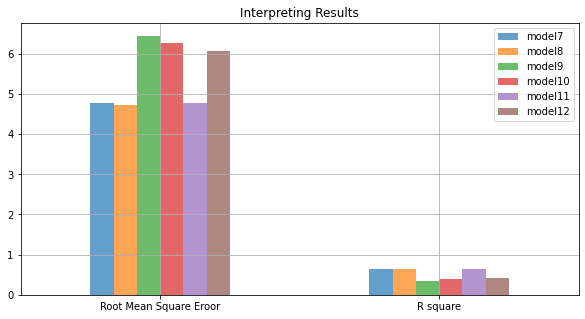

In [ ]:
results = pd.DataFrame({'model7':[rmse7,r27],
                        'model8':[rmse8,r28],
                        'model9':[rmse9,r29],
                        'model10':[rmse10,r210],
                        'model11':[rmse11,r211],
                        'model12':[rmse12,r212]},
                       index=['Root Mean Square Eroor','R square'])
results.plot(kind = 'bar',alpha = 0.7, grid=True, title='Interpreting Results', rot = 0, figsize=(10,5))